In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
file="indian_startup_funding_Lab7.xlsx"
df=pd.read_excel(file)


In [3]:
df.duplicated(subset=None,keep='first').sum()

0

In [4]:
df.isnull().sum()

Sr No                  0
Date                   0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         2
InvestmentnType        3
Amount in USD          0
Remarks              111
Column1              110
Column2              103
Column3              103
dtype: int64

In [5]:
df.dropna(subset=["Investors Name","InvestmentnType"],axis=0,inplace=True)

In [6]:
df.drop(["Remarks","Column1","Column2","Column3"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Sr No                0
Date                 0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [15]:
df[df['Amount in USD']=='Undisclosed']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD


In [108]:
df['Amount in USD'].replace('Undisclosed','None',inplace=True)

In [9]:
df.drop(labels=[44,107], axis=0,inplace=True)

In [10]:
df[df['Amount in USD']=='Undisclosed']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD


In [33]:
df['Amount in USD']=pd.to_numeric(df['Amount in USD'],errors='coerce')

In [34]:
df.dtypes

Sr No                         int64
Date                 datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD               float64
dtype: object

In [36]:
df['Amount in USD'].mean()

94857895.25

In [40]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,231000000.0
1,12,2019-12-17,Healthians,B2B-focused foodtech startup,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,12000000.0
2,13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,30000000.0
4,15,2019-12-14,Trell,Video,Experience Discovery Platform,Bengaluru,Ruizheng Investment,Seed Round,2000000.0
5,11,2019-12-13,Rivigo,Technology,Logistics Services and Solutions,Gurgaon,"SAIF Partners, Spring Canter Investment Ltd.",Series F,20000000.0


In [43]:
#download file to correct speelling mistakes using excel
df.to_csv("STARTUP FUNDING.csv",index=False)

In [4]:
file="STARTUP FUNDING.csv"
df=pd.read_csv(file)
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Unnamed: 9,Unnamed: 10
0,1,11/11/2019,eBikeGo,Last Mile Transportation,Electric bike rental,Amritsar,Startup Buddy,Seed,"$300,000.00",NaN,NaN
1,2,10/7/2019,Indus OS,Tech,Smartphone Operating System,Andheri,Ventureast,Series B,"$5,750,000.00",NaN,NaN
2,3,17/12/2019,Healthians,B2B-focused foodies start-up,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,"$12,000,000.00",NaN,NaN
3,4,16/12/2019,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,"$30,000,000.00",NaN,NaN
4,5,14/12/2019,Trell,Video,Experience Discovery Platform,Bengaluru,Ruizheng Investment,Seed Round,"$2,000,000.00",NaN,NaN


In [5]:
df['Amount in USD'] = df['Amount in USD'].str.replace('$', '')
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')

C:\Users\owner\AppData\Local\Temp/ipykernel_15696/1117246286.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount in USD'] = df['Amount in USD'].str.replace('$', '')


In [6]:
df.drop(["Unnamed: 9","Unnamed: 10"],axis=1,inplace=True)

In [7]:
df['Amount in USD']=df['Amount in USD'].astype('float')

In [8]:
df.dtypes

Sr No                  int64
Date                  object
Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentnType       object
Amount in USD        float64
dtype: object

In [9]:
#Get top 10 largest top 10 Amount in USD
df_top=df.nlargest(10, 'Amount in USD')
df_top

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
11,12,27/8/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
89,90,25/11/2019,Paytm,Intech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09
8,9,2/10/2019,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series D,5.850000e+08
65,66,4/9/2019,GOQii,Health and Wellness,Wearable Fitness Bands,Menlo Park,Bennett Coleman and Company Ltd (BCCL),Series C,4.500000e+08
63,64,15/11/2019,Vogo Automotive,Last Mile Transportation,Scooter sharing app,Kormangala,"Matrix Partners, Stellaris Venture Partners, K...",Series B,2.830000e+08
39,40,20/12/2019,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,2.310000e+08
59,60,8/2/2019,Zilingo,E-Commerce,Fashion & Apparel,India/Singapore,"Sequoia Capital and Temasek Holdings, EDBI, Bu...",Series D,2.260000e+08
37,38,19/11/2019,Digital Mall Asia,E-Commerce,Virtual E-Commerce platform,Delhi,Amour Infrastructure,Seed Funding,2.200000e+08
15,16,10/7/2019,"""BYJU\\'S""",Etch,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,1.500000e+08
25,26,1/5/2019,BlackBuck,Transport,Logistics,Bengaluru,Goldman Sachs Investment Partners and Silicon ...,Series D,1.500000e+08


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df_industry=df_top.groupby('City  Location').sum()
df_industry

,Sr No,Amount in USD
City Location,,
Bengaluru,63,4.785000e+09
Delhi,38,2.200000e+08
Faridabad,40,2.310000e+08
India/Singapore,60,2.260000e+08
Kormangala,64,2.830000e+08
Menlo Park,66,4.500000e+08
Noida,90,1.000000e+09


Text(0, 0.5, 'Amount in USD')

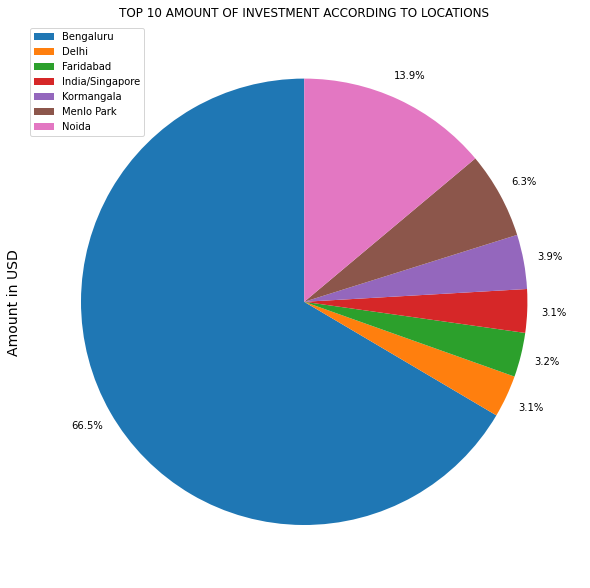

In [12]:
df_industry.plot(kind='pie',y='Amount in USD',figsize=(10,15),autopct='%1.1f%%',
                startangle=90,labels=None,pctdistance=1.12)
plt.title("TOP 10 AMOUNT OF INVESTMENT ACCORDING TO LOCATIONS")
plt.ylabel("Amount in USD", size=14)

In [15]:
df_industry=df_top.groupby('Industry Vertical').sum()
industry=df_industry.index
amount=df_industry["Amount in USD"]/10000000

C:\Users\owner\AppData\Local\Temp/ipykernel_15696/3225910307.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('INDUSTRY',SIZE=15)


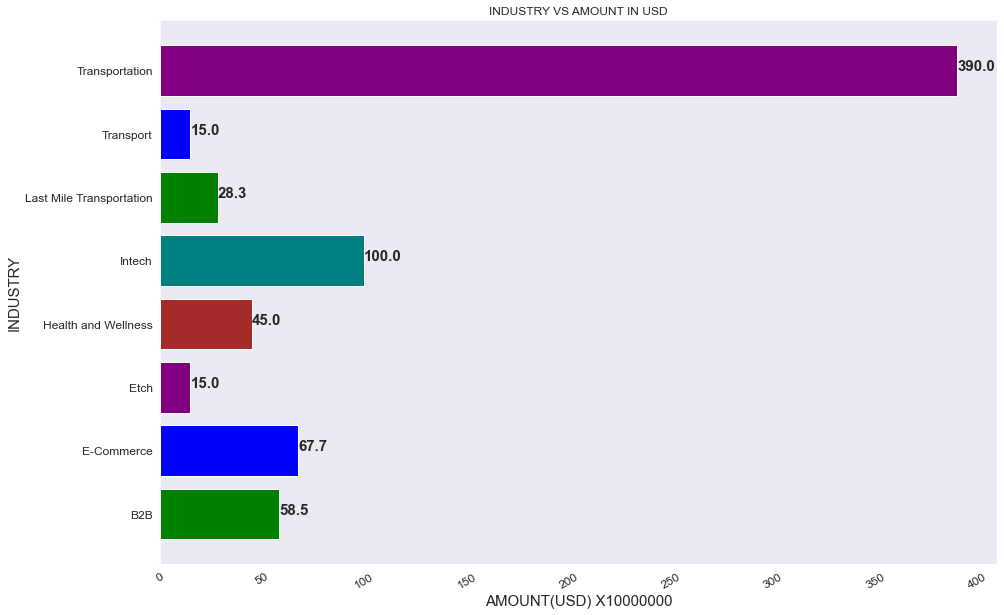

In [18]:
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (15, 10)
New_Colors = ['green','blue','purple','brown','teal']

plt.barh(industry, amount,color=New_Colors,)

plt.xticks(rotation=30, horizontalalignment="center",size=12)
plt.yticks(size=12)

plt.title('INDUSTRY VS AMOUNT IN USD')
plt.xlabel('AMOUNT(USD) X10000000',size= 15)
plt.ylabel('INDUSTRY',SIZE=15)

for index, value in enumerate(amount):
    plt.text(value, index,
             str(value),fontweight = 'bold',size=15)

plt.show()